In [1]:
# 必要なライブラリをimportします
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# 可視化のためのセットです。
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Yahooからデータを読み込めるようにします
from pandas_datareader import DataReader
# Pythonで日付と時刻を扱うためのモジュールです
from datetime import datetime

# Python2を使っている場合は必要です
#from __future__ import division


In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# 直近1年間のデータを使ってみましょう。
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

# それぞれの企業ごとに、Yahooのサイトからデータを取得します
for stock in tech_list:   
    # それぞれの名前でDataFrameを作ります。
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [3]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,190.708566,187.324144,188.966415,189.037371,3.138342e+07,187.437784
std,20.325241,19.805026,20.110347,20.118357,1.344142e+07,20.687892
min,157.889999,150.240005,154.830002,155.149994,1.251390e+07,152.855148
25%,174.244995,171.740005,172.815002,172.785004,2.251980e+07,170.580582
50%,186.529999,183.669998,185.179993,185.160004,2.840140e+07,183.821686
75%,209.375000,205.784996,207.680000,207.760002,3.692755e+07,206.783493
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,231.263092


In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-11-13 to 2018-11-09
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


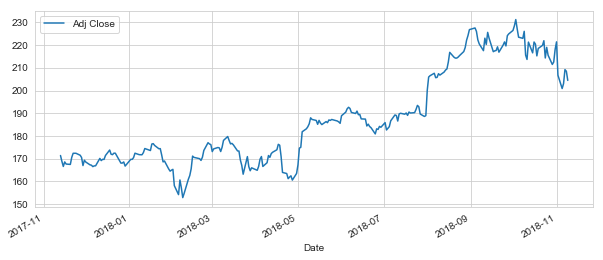

In [5]:
# 終値の時系列をプロットしてみます。
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

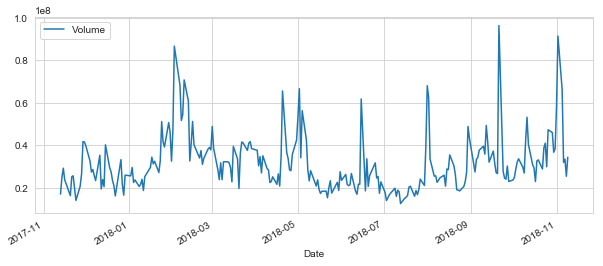

In [6]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

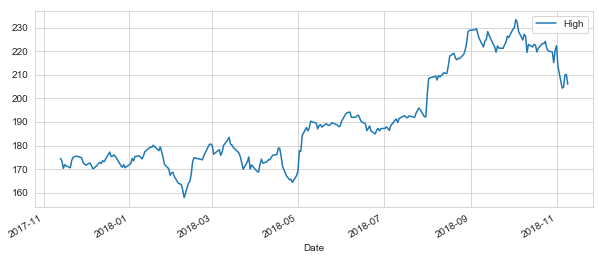

In [7]:
AAPL['High'].plot(legend=True,figsize=(10,4))

In [8]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name='MA {}'.format(ma)
    AAPL[column_name]=AAPL['Adj Close'].rolling(window=ma,center=False).mean()
    

In [9]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2017-11-13,174.500000,173.399994,173.500000,173.970001,16982100.0,171.396790,NaN,NaN,NaN
2017-11-14,173.479996,171.179993,173.039993,171.339996,24782500.0,168.805664,NaN,NaN,NaN
2017-11-15,170.320007,168.380005,169.970001,169.080002,29158100.0,166.579117,NaN,NaN,NaN
2017-11-16,171.869995,170.300003,171.179993,171.100006,23637500.0,168.569260,NaN,NaN,NaN
2017-11-17,171.389999,169.639999,171.039993,170.149994,21899500.0,167.633301,NaN,NaN,NaN


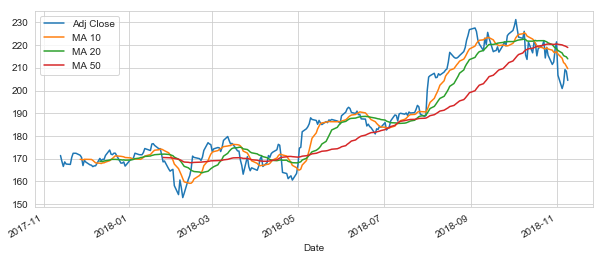

In [10]:
AAPL[['Adj Close','MA 10','MA 20','MA 50']].plot(subplots=False,figsize=(10,4))

In [11]:
# pct_changeを使うと、変化の割合を計算できます。
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()


In [12]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2017-11-13,174.500000,173.399994,173.500000,173.970001,16982100.0,171.396790,NaN,NaN,NaN,NaN
2017-11-14,173.479996,171.179993,173.039993,171.339996,24782500.0,168.805664,NaN,NaN,NaN,-0.015118
2017-11-15,170.320007,168.380005,169.970001,169.080002,29158100.0,166.579117,NaN,NaN,NaN,-0.013190
2017-11-16,171.869995,170.300003,171.179993,171.100006,23637500.0,168.569260,NaN,NaN,NaN,0.011947
2017-11-17,171.389999,169.639999,171.039993,170.149994,21899500.0,167.633301,NaN,NaN,NaN,-0.005552


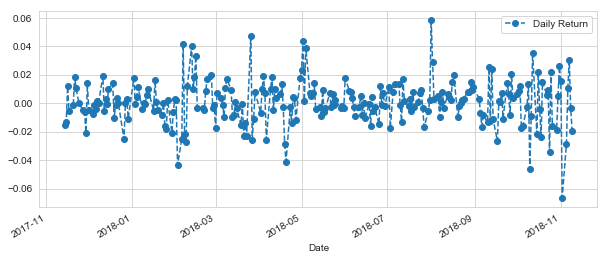

In [13]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

/Users/suzukishinji/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


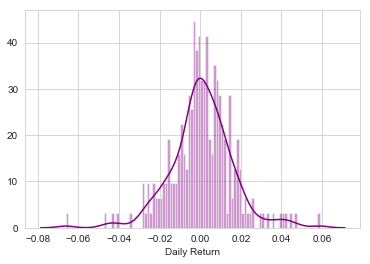

In [14]:
# NaNを取り除くコードを書いておく必要があります。
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

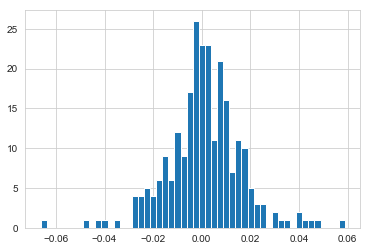

In [15]:
AAPL['Daily Return'].hist(bins=50)

In [16]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [17]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-11-13,171.396790,1129.170044,1025.750000,82.444153
2017-11-14,168.805664,1136.839966,1026.000000,82.562035
2017-11-15,166.579117,1126.689941,1020.909973,81.920334
2017-11-16,168.569260,1137.290039,1032.500000,82.137527
2017-11-17,167.633301,1129.880005,1019.090027,81.347740


In [18]:
tech_rets = closing_df.pct_change()


In [19]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-11-13,NaN,NaN,NaN,NaN
2017-11-14,-0.015118,0.006793,0.000244,0.001430
2017-11-15,-0.013190,-0.008928,-0.004961,-0.007772
2017-11-16,0.011947,0.009408,0.011353,0.002651
2017-11-17,-0.005552,-0.006516,-0.012988,-0.009615


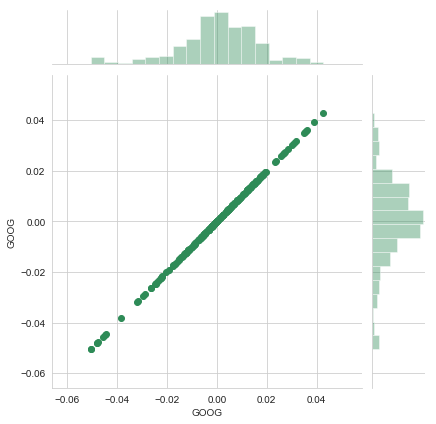

In [20]:
# Google同士なら、完全に相関します。
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

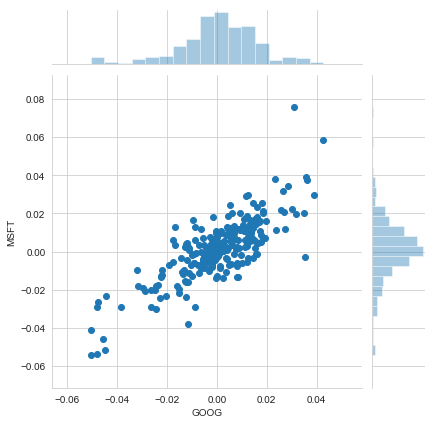

In [21]:
# GoogleとMicrosoftを比べてみます。
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

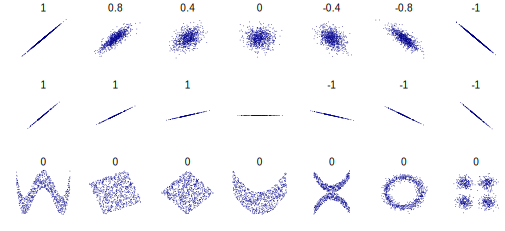

In [22]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

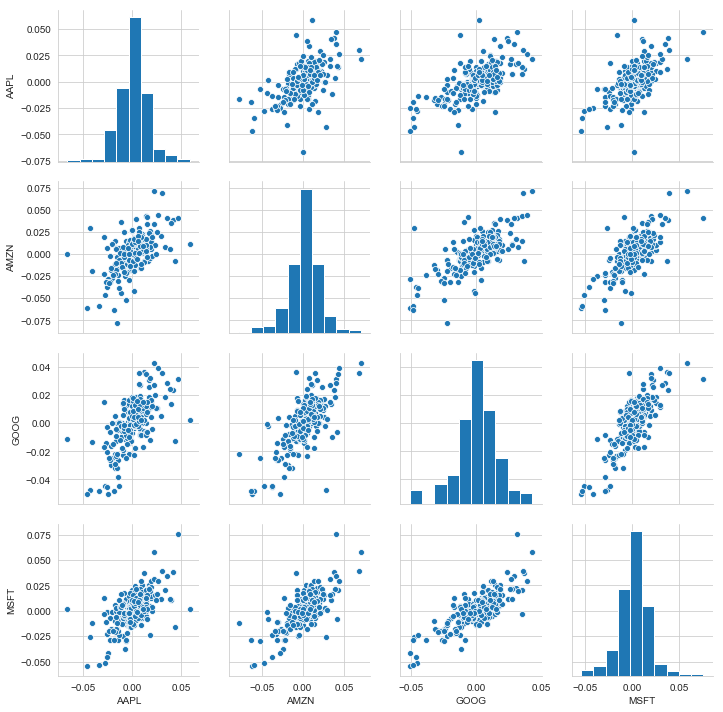

In [23]:
sns.pairplot(tech_rets.dropna())


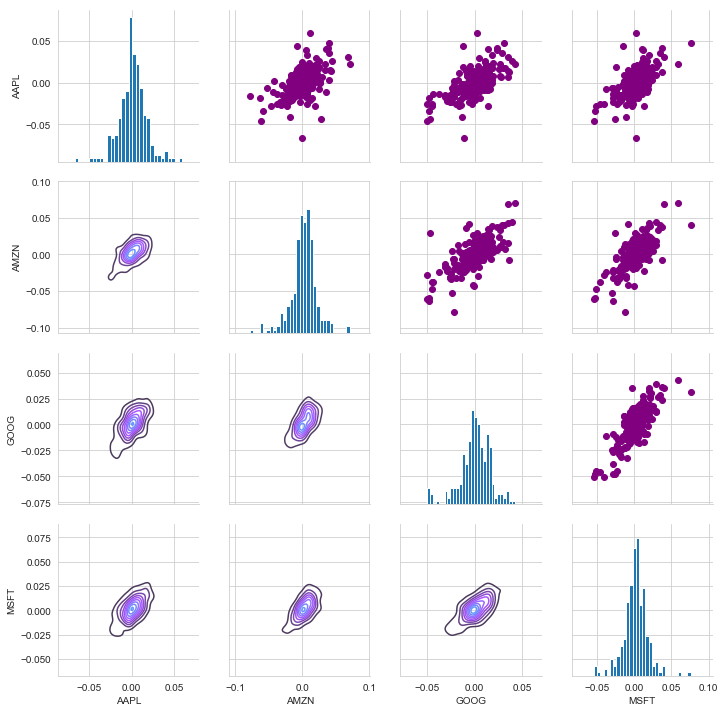

In [24]:
# データを格納しているDataFrameを引数にして、PairGridを作ります。
returns_fig = sns.PairGrid(tech_rets.dropna())

# 右上側に描くグラフの種類を指定します。
returns_fig.map_upper(plt.scatter,color='purple')

# 同じように、左下側には、KDEプロットを描くことにしましょう。
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# 対角線上には、ヒストグラムを描くことにします。
returns_fig.map_diag(plt.hist,bins=30)

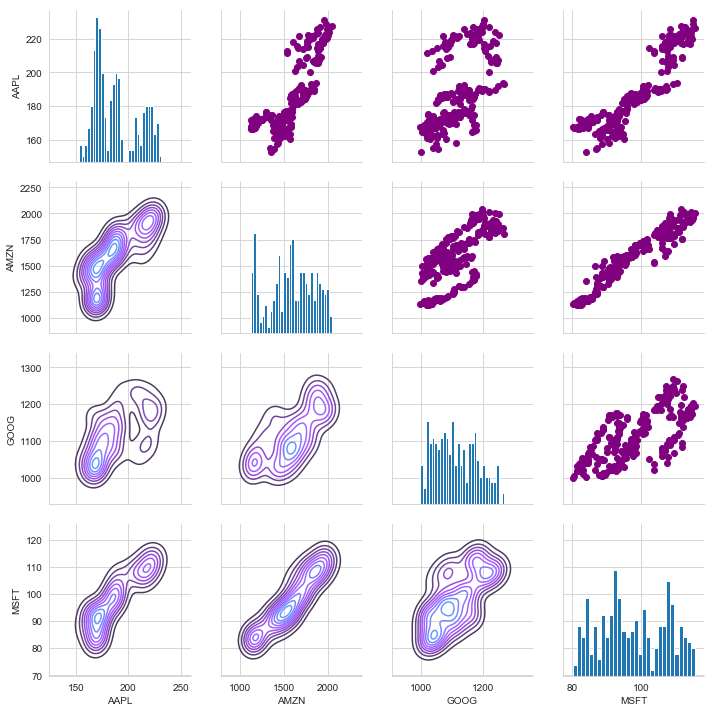

In [25]:
# この部分以外は同じコードです。
#終値

returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

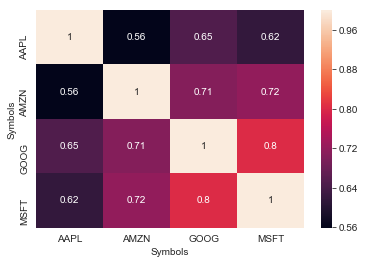

In [26]:
# 相関係数の数値が欲しい場合には、heatmapが使えます。
sns.heatmap(tech_rets.corr(), annot=True)

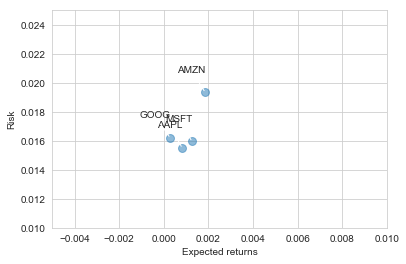

In [27]:
# リスクの基本はその株価の変動幅です。
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.005,0.01])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# グラフにアノテーションを付けます。詳しくは、以下を参照してみてください。
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (0, 20),
        textcoords = 'offset points', ha = 'right',
        arrowprops = dict(arrowstyle='-', connectionstyle= 'arc3'))

In [28]:
# 5パーセンタイルの位置にある変動率は？
rets['AAPL'].quantile(0.05)

-0.0242594720401451

In [29]:
# 1年を基準にします。
days = 365

# 1日分の差分です。
dt = 1/days

# 日々の変動の平均を計算します。
mu = rets.mean()['GOOG']

# ボラティリティ（volatility：株価の変動の振れ幅）を変動の標準偏差で計算します。
sigma = rets.std()['GOOG']

In [30]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' この関数は、シミュレーションの結果の価格リストを返します。'''
    
    # 戻り値となる価格のリストを返します。
    price = np.zeros(days)
    price[0] = start_price
    # Shock と Driftです。
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # 指定された日数のところまで、計算します。
    for x in range(1,days):
        #  shockを計算します
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Driftを計算します。
        drift[x] = mu * dt
        # これらを使って価格を計算します。
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [31]:

GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-13,1031.579956,1022.570007,1023.419983,1025.750000,885800,1025.750000
2017-11-14,1026.810059,1014.150024,1022.590027,1026.000000,959200,1026.000000
2017-11-15,1024.089966,1015.419983,1019.210022,1020.909973,854000,1020.909973
2017-11-16,1035.920044,1022.520020,1022.520020,1032.500000,1129700,1032.500000
2017-11-17,1034.420044,1017.750000,1034.010010,1019.090027,1397100,1019.090027


In [32]:
GOOG.iloc[0,5]

1025.75

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

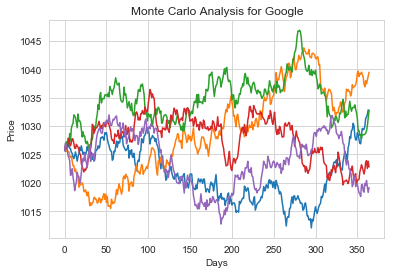

In [38]:
# 最初の終値から始めます。
start_price = GOOG.iloc[0,5]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [40]:
# 回数を指定します。
runs = 10000

# 結果を保持するarrayです。
simulations = np.zeros(runs)

# これは、表示のオプションです。
np.set_printoptions(threshold=5)

for run in range(runs):    
    # 最終的な値をシミュレーション結果として保持します。
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

In [37]:
# 最終的な株価のヒストグラムを表示します。
plt.hist(simulations,bins=200)

# 1パーセンタイルの位置を設定します。
q = np.percentile(simulations, 1)

# プロットに追加的な情報を載せます。

# 最初の株価
plt.figtext(0.6, 0.8, s="Start price: {:0.2f}".format(start_price))
# 最終的な株価の平均値
plt.figtext(0.6, 0.7, "Mean final price: {:0.2f}".format(simulations.mean()))

# Value at Risk (信頼区間99%）
plt.figtext(0.6, 0.6, "VaR(0.99): {:0.2f}".format(start_price - q))

# 1パーセンタイル
plt.figtext(0.15, 0.6, "q(0.99): {:0.2f}".format(q))

# 1% クォンタイルに線を描きます
plt.axvline(x=q, linewidth=4, color='r')

# タイトル
plt.title("Final price distribution for Google Stock after {} days".format(days), weight='bold');

NameError: name 'simulations' is not defined

(array([1., 0., 0., ..., 0., 1., 1.]),
 array([ 958.40123459,  959.07926201,  959.75728943, ..., 1092.65066429,
        1093.32869171, 1094.00671914]),
 <a list of 200 Patch objects>)

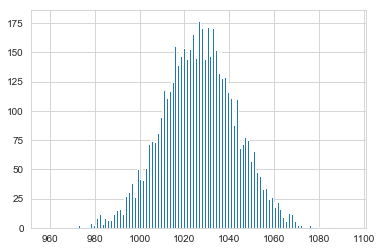

In [41]:
plt.hist(simulations,bins=200)

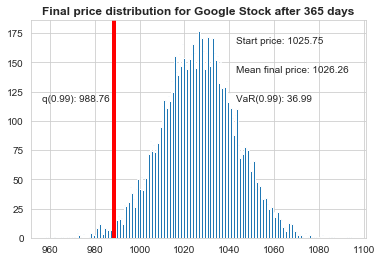

In [42]:
# 最終的な株価のヒストグラムを表示します。
plt.hist(simulations,bins=200)

# 1パーセンタイルの位置を設定します。
q = np.percentile(simulations, 1)

# プロットに追加的な情報を載せます。

# 最初の株価
plt.figtext(0.6, 0.8, s="Start price: {:0.2f}".format(start_price))
# 最終的な株価の平均値
plt.figtext(0.6, 0.7, "Mean final price: {:0.2f}".format(simulations.mean()))

# Value at Risk (信頼区間99%）
plt.figtext(0.6, 0.6, "VaR(0.99): {:0.2f}".format(start_price - q))

# 1パーセンタイル
plt.figtext(0.15, 0.6, "q(0.99): {:0.2f}".format(q))

# 1% クォンタイルに線を描きます
plt.axvline(x=q, linewidth=4, color='r')

# タイトル
plt.title("Final price distribution for Google Stock after {} days".format(days), weight='bold');

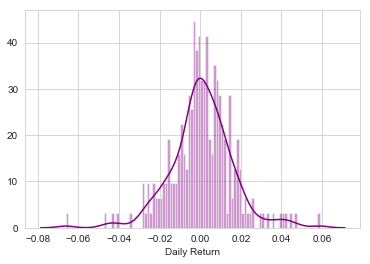

In [34]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [35]:
rets['AAPL'].quantile(0.05)


-0.0242594720401451